In [87]:
# !pip install transformers
import librosa
import librosa.display
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt

from CLIPIMAGES import get_image_embeddings, find_image_matches, make_train_valid_dfs

def visualize_series(timeseries, image_name):
    chroma = librosa.feature.chroma_stft(S=np.abs(librosa.stft(timeseries, n_fft=256)), sr=4000)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(1, 1)
    img = librosa.display.specshow(chroma)
    fig.savefig(image_name + '.png', bbox_inches='tight', pad_inches=0)
    plt.close()

def plot_matches(values):
    emptycount = 0
    plt.figure(figsize=(20,10))
    for i in values:
        if len(np.unique(np.array(i))) == 1:
            emptycount+=1
        else:
            plt.plot(i)
        
    print("Out of ", len(values), " matches, ", emptycount, " are empty")
    

In [94]:
train_df, valid_df = make_train_valid_dfs()
model, image_embeddings = get_image_embeddings(train_df, "/content/drive/MyDrive/BACHELOR'S DATA/weights/BTC_IMAGES_10000.pt")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Dist

  0%|          | 0/250 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [138]:
matches = find_image_matches(model, 
             image_embeddings,
             query="The steady rise in BTC price not only reflects its immense value as a digital asset, but also offers a promising outlook for investors, fueling excitement and confidence in its future trajectory.",
             image_filenames=train_df['image'].values,
             n=9)

In [139]:
matches

['860.png',
 '2247.png',
 '333.png',
 '274.png',
 '988.png',
 '1148.png',
 '1080.png',
 '779.png',
 '1359.png']

Out of  9  matches,  0  are empty


46760.69082465281

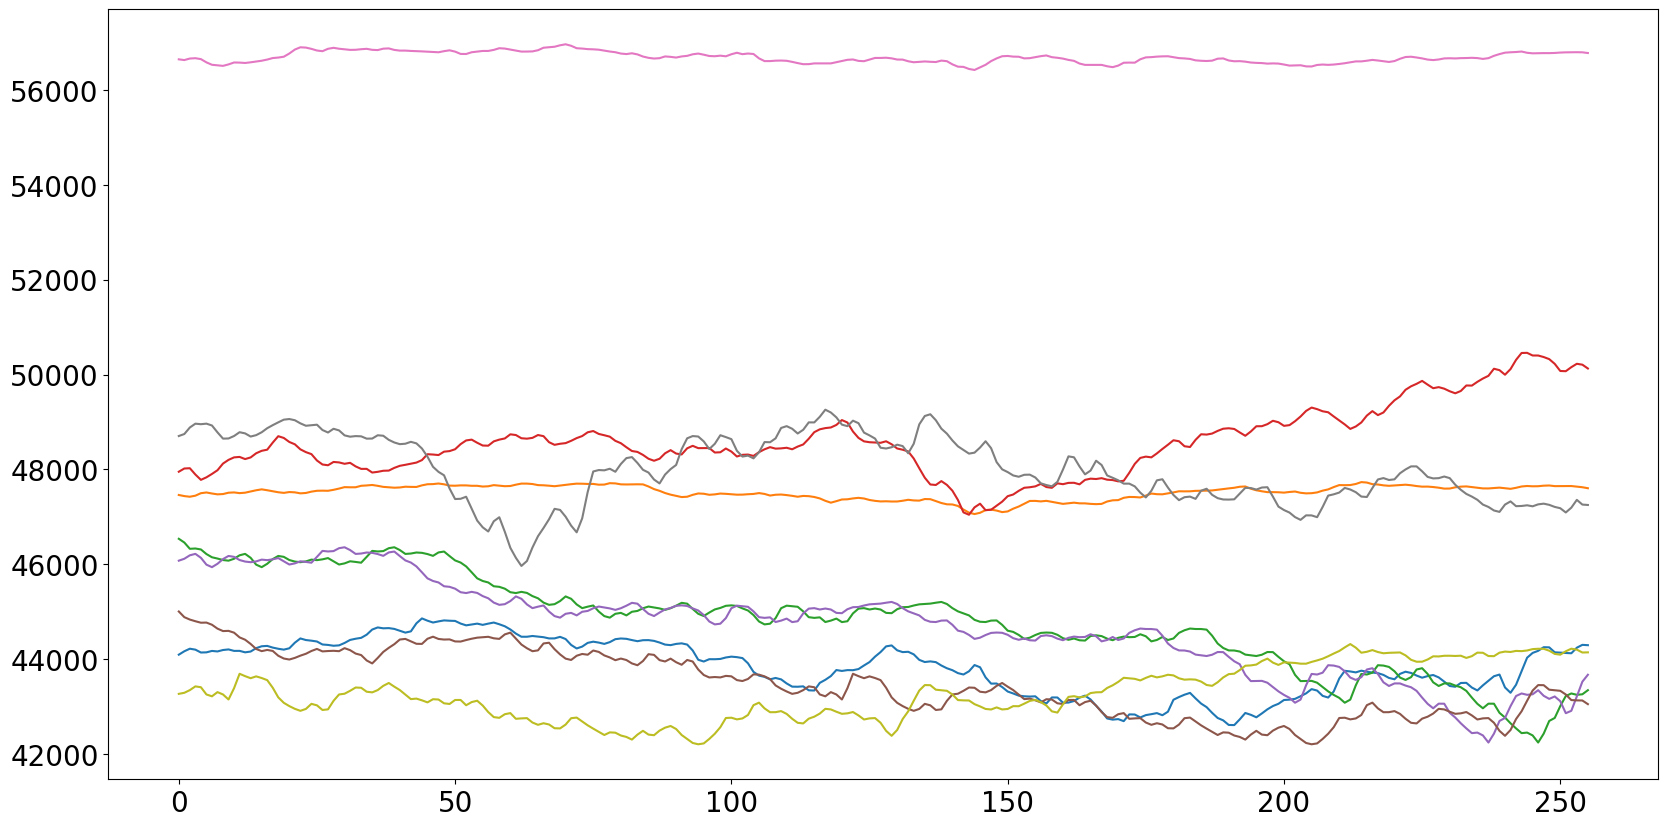

In [140]:
p = df.iloc[[int(i.split('.')[0]) for i in matches], :].reset_index(drop = True)

toplot = []
for i in range(len(p)):
  toplot.append(p.iloc[i, 1:].values)

plot_matches(toplot)
np.array(toplot).mean(axis = 0).mean()

46760.69082465281

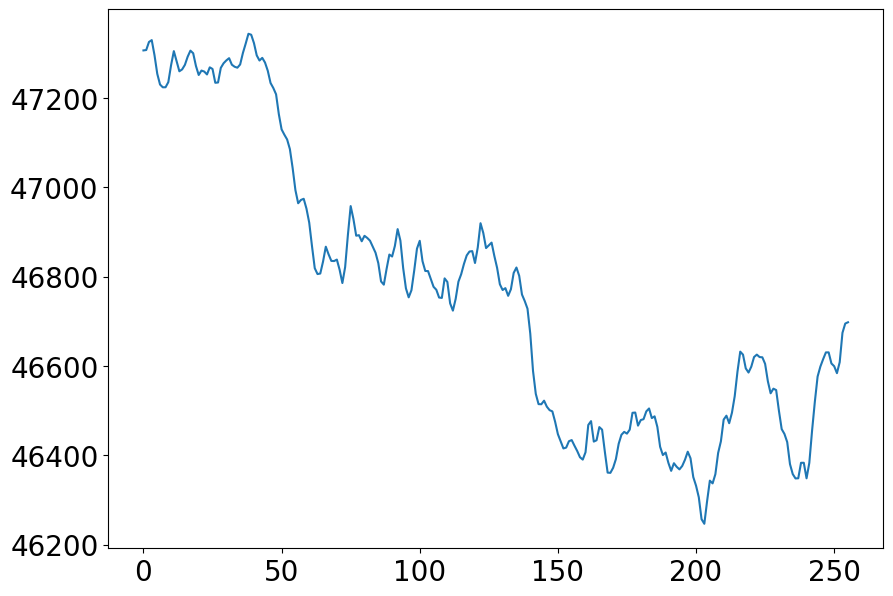

In [141]:
plt.figure(figsize=(10,7))

plt.plot(np.array(toplot).mean(axis=0))
plt.savefig("btc_images_pos_pred_mean.png")
np.array(toplot).mean(axis=0).mean()

In [134]:
matches = find_image_matches(model, 
             image_embeddings,
             query="The volatile nature of BTC price can make it challenging for investors to predict and navigate, causing anxiety and uncertainty in the market.",
             image_filenames=valid_df['image'].values,
             n=9)

In [135]:
matches

['3350.png',
 '8990.png',
 '1448.png',
 '1259.png',
 '3928.png',
 '4687.png',
 '4374.png',
 '2999.png',
 '5583.png']

Out of  9  matches,  0  are empty


41329.15796223961

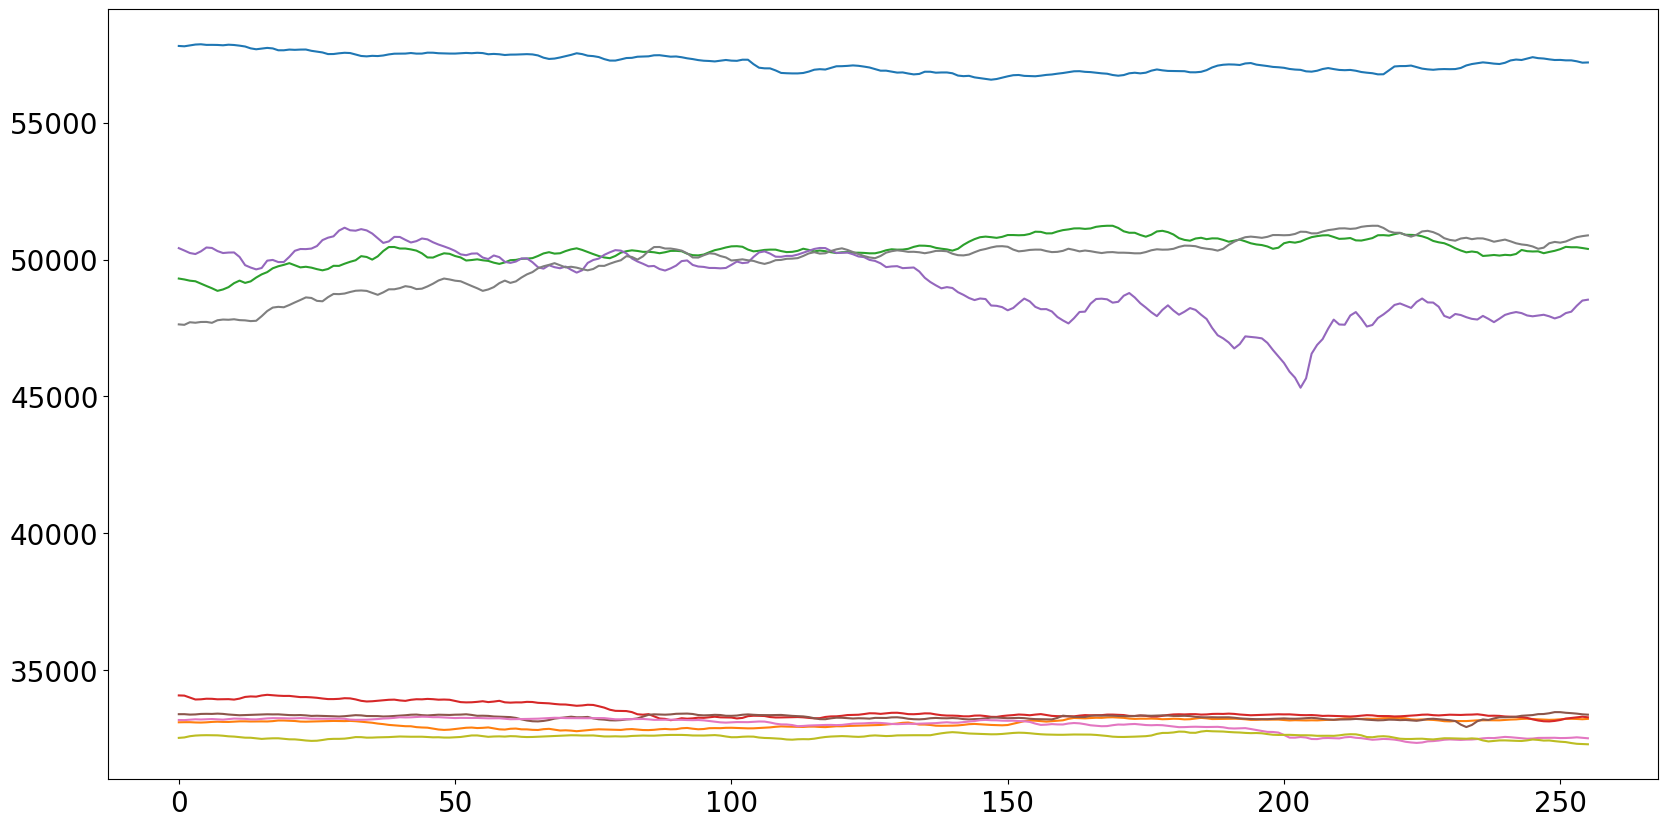

In [136]:
p = df.iloc[[int(i.split('.')[0]) for i in matches], :].reset_index(drop = True)

toplot = []
for i in range(len(p)):
  toplot.append(p.iloc[i, 1:].values)

plot_matches(toplot)
np.array(toplot).mean(axis = 0).mean()


41329.15796223961

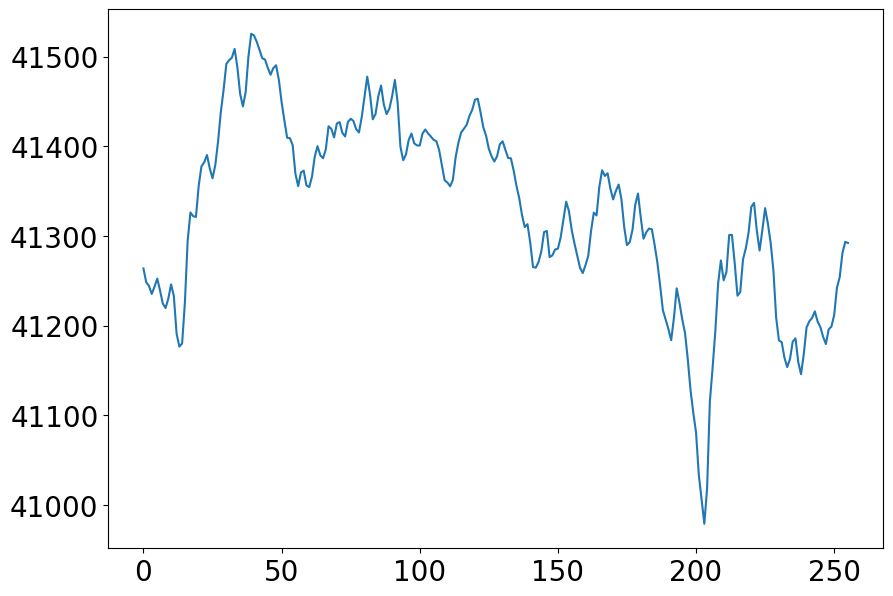

In [137]:
plt.figure(figsize=(10,7))

plt.plot(np.array(toplot).mean(axis=0))
plt.savefig("btc_images_neg_pred_mean.png")
np.array(toplot).mean(axis=0).mean()